In [1]:
import tensorflow as tf
from tensorflow import keras   #keras in a deep learning lib based on python
import numpy as np
import matplotlib.pyplot as plt

## Import dataset: fashion_mnist

In [2]:
data = keras.datasets.fashion_mnist  
#load default dataset: fashion_mnist 
#训练集为 60,000 张 28x28 像素灰度图像，测试集为 10,000 同规格图像，总共 10 类时尚物品标签。

In [3]:
(X_train, y_train),(X_test, y_test) = data.load_data()

In [4]:
X_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [5]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [6]:
print(y_train[0])    # labels 0,1,...,9

9


In [7]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

## Data exploration

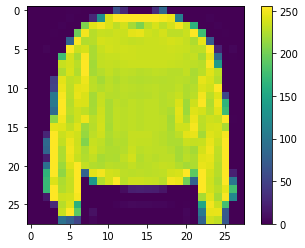

In [8]:
plt.figure()
plt.imshow(X_train[7])
plt.colorbar()

In [9]:
print(X_train[7])

[[  0   0   0   0   0   1   1   0   0   0   0  63  28   0   0   0  33  85
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   2   0   0  28 126 241 255 255 255 255 255 255 252
  248 111   0   0   0   2   0   0   0   0]
 [  0   0   0   0   2   0   0 206 244 251 241 230 238 221 205 230 240 230
  239 251 233 165   0   0   2   0   0   0]
 [  0   0   0   1   0   0 199 251 228 234 233 236 235 245 247 237 234 239
  230 230 235 255 176   0   0   1   0   0]
 [  0   0   0   0   0  81 254 226 228 239 237 236 234 232 233 235 235 236
  239 237 233 225 246  73   0   0   0   0]
 [  0   0   3   0   0 255 235 239 223 234 238 236 237 236 235 235 235 235
  236 235 234 230 231 255  24   0   4   0]
 [  0   0   0   0 177 239 223 254 223 232 234 234 236 236 235 235 235 235
  235 234 231 233 222 246  88   0   1   0]
 [  0   0   0   0 234 239 229 255 220 232 233 232 234 235 235 235 235 235
  234 233 232 230 228 254 140   0   0   0]
 [  0   0   0   0 225 240 226 255 221 227 232 228 231 230 228 22

In [10]:
X_train=X_train/255.0
X_test=X_test/255.0

In [11]:
print(X_train[7])

[[0.         0.         0.         0.         0.         0.00392157
  0.00392157 0.         0.         0.         0.         0.24705882
  0.10980392 0.         0.         0.         0.12941176 0.33333333
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.00784314
  0.         0.         0.10980392 0.49411765 0.94509804 1.
  1.         1.         1.         1.         1.         0.98823529
  0.97254902 0.43529412 0.         0.         0.         0.00784314
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.00784314 0.
  0.         0.80784314 0.95686275 0.98431373 0.94509804 0.90196078
  0.93333333 0.86666667 0.80392157 0.90196078 0.94117647 0.90196078
  0.9372549  0.98431373 0.91372549 0.64705882 0.         0.
  0.00784314 0.         0.         0.        ]
 [0.         0.         0.         0.00392157 0.         0.
  0.78039216 0.

## Build model

In [12]:
model = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),  # input layer: flatten 
                          keras.layers.Dense(128, activation='relu'),  # fully-connection layer: dense 
                          keras.layers.Dense(10, activation='softmax')  # output layer: dense 
                         ])
#Flatten层用来将输入“压平”，即把多维的输入一维化，常用在从卷积层到全连接层的过渡
#Keras框架中的Dense()，用来对上一层的神经元进行全部连接，实现特征的非线性组合

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


## Model compilation

In [14]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
#history = model.fit(X_train, y_train, epochs=10,batch_size=10) 

In [16]:
history = model.fit(X_train, y_train, epochs=10, batch_size=10,validation_split=0.2) 


Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 10s 212us/sample - loss: 0.4993 - accuracy: 0.8206 - val_loss: 0.4182 - val_accuracy: 0.8504
Epoch 2/10
48000/48000 [==============================] - 9s 197us/sample - loss: 0.3752 - accuracy: 0.8640 - val_loss: 0.3573 - val_accuracy: 0.8702
Epoch 3/10
48000/48000 [==============================] - 10s 201us/sample - loss: 0.3389 - accuracy: 0.8770 - val_loss: 0.3473 - val_accuracy: 0.8731
Epoch 4/10
48000/48000 [==============================] - 9s 197us/sample - loss: 0.3167 - accuracy: 0.8813 - val_loss: 0.3418 - val_accuracy: 0.8763
Epoch 5/10
48000/48000 [==============================] - 9s 197us/sample - loss: 0.2979 - accuracy: 0.8879 - val_loss: 0.3371 - val_accuracy: 0.8804
Epoch 6/10
48000/48000 [==============================] - 9s 196us/sample - loss: 0.2820 - accuracy: 0.8941 - val_loss: 0.3514 - val_accuracy: 0.8737
Epoch 7/10
48000/48000 [========================

In [17]:
test_loss,test_acc = model.evaluate(X_test,y_test)
print("Tested acc:", test_acc)
print("Tested loss:", test_loss)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Tested acc: 0.883
Tested loss: 0.36386442291736604


In [18]:
from sklearn.metrics import accuracy_score

In [19]:
y_pred = model.predict_classes(X_test)
accuracy_score(y_test,y_pred)

0.883

In [20]:
y_pred

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [21]:
pred = model.predict(X_test)
pred

array([[2.1871167e-09, 1.8218176e-14, 3.3108746e-14, ..., 2.2277759e-02,
        1.0255209e-09, 9.4808000e-01],
       [8.4807743e-07, 4.0832194e-20, 9.9994409e-01, ..., 1.5585004e-28,
        5.9282456e-13, 1.5454968e-16],
       [1.6034430e-14, 1.0000000e+00, 2.8467317e-18, ..., 1.2790504e-35,
        7.3025142e-18, 1.7944006e-30],
       ...,
       [5.8334827e-08, 5.6900735e-16, 5.4659627e-10, ..., 8.5752933e-12,
        9.9999988e-01, 2.4825655e-18],
       [1.1029965e-14, 1.0000000e+00, 4.8896975e-17, ..., 3.1621766e-22,
        1.8091161e-11, 8.8871451e-20],
       [7.2160256e-06, 4.6775018e-11, 2.4814337e-06, ..., 1.3559026e-04,
        9.1981594e-05, 1.2615943e-06]], dtype=float32)

In [22]:
np.argmax(pred[0])

9

In [23]:
np.argmax(pred[1])

2

## Plot Learning curve and Confusion matrix

In [24]:
help(model)

Help on Sequential in module tensorflow.python.keras.engine.sequential object:

class Sequential(tensorflow.python.keras.engine.training.Model)
 |  Sequential(layers=None, name=None)
 |  
 |  Linear stack of layers.
 |  
 |  Arguments:
 |      layers: list of layers to add to the model.
 |  
 |  Example:
 |  
 |  ```python
 |  # Optionally, the first layer can receive an `input_shape` argument:
 |  model = Sequential()
 |  model.add(Dense(32, input_shape=(500,)))
 |  # Afterwards, we do automatic shape inference:
 |  model.add(Dense(32))
 |  
 |  # This is identical to the following:
 |  model = Sequential()
 |  model.add(Dense(32, input_dim=500))
 |  
 |  # And to the following:
 |  model = Sequential()
 |  model.add(Dense(32, batch_input_shape=(None, 500)))
 |  
 |  # Note that you can also omit the `input_shape` argument:
 |  # In that case the model gets built the first time you call `fit` (or other
 |  # training and evaluation methods).
 |  model = Sequential()
 |  model.add(Dens

In [25]:
history.history

{'loss': [0.4993032821295977,
  0.37518328932608713,
  0.3388638333050646,
  0.31670002504721195,
  0.29789307179214425,
  0.282031206465017,
  0.27179170430715505,
  0.26042718198680026,
  0.25023606601451925,
  0.24174579977997382],
 'accuracy': [0.82060415,
  0.8640417,
  0.87704164,
  0.88133335,
  0.8879375,
  0.8940833,
  0.89904165,
  0.90316665,
  0.9054375,
  0.9093125],
 'val_loss': [0.41820011326422296,
  0.3572539220796898,
  0.34728349503401357,
  0.341815402910579,
  0.33714364455100926,
  0.3513736184493367,
  0.35299904250651404,
  0.33029123611107936,
  0.364018699018925,
  0.33023948249135476],
 'val_accuracy': [0.85041666,
  0.87016666,
  0.87308335,
  0.87633336,
  0.8804167,
  0.87375,
  0.87991667,
  0.88325,
  0.87825,
  0.887]}

In [26]:
# plt.plot(history.history['accuracy'])
# plt.title('Model accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train'],loc='upper left')
# plt.show()

# plt.plot(history.history['loss'])
# plt.title('Model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train'],loc='upper left')
# plt.show()


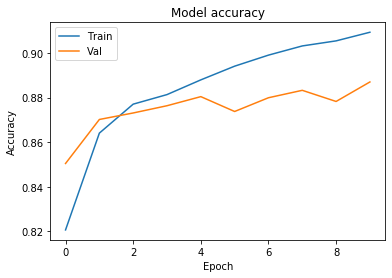

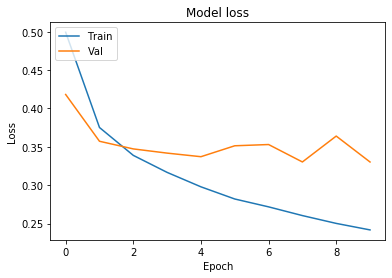

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'],loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'],loc='upper left')
plt.show()

#  train acc > val acc means over fitting, stop training


In [28]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x17722746a48>)

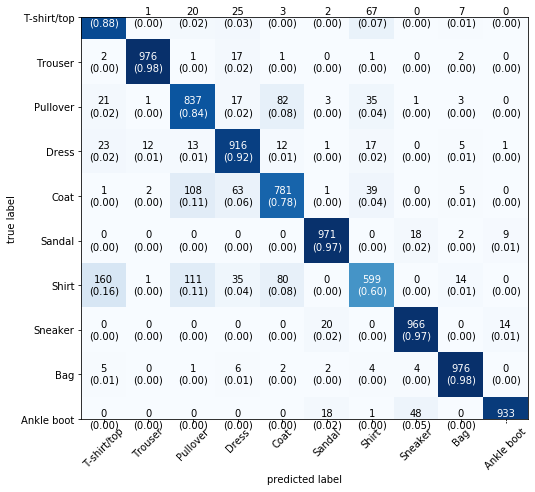

In [29]:
mat = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat=mat,figsize=(8,8), class_names=class_names,show_normed=True)